In [1]:
# embed image generated by plot
%matplotlib notebook
%matplotlib inline

In [2]:
# import
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def setChinese():
    plt.rcParams['font.family'] = ['FangSong']
    # plt.rcParams['font.family'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False

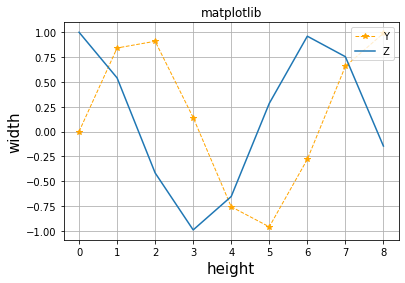

In [3]:
# 6-18 line chart

point_num = 9
x = np.arange(point_num)

y = np.sin(x)
z = np.cos(x)

plt.plot(x, y, marker='*', linewidth=1, linestyle='--', color='orange')
plt.plot(x, z)

plt.title('matplotlib')
plt.xlabel('height', fontsize=15)
plt.ylabel('width', fontsize=15)
plt.legend(['Y', 'Z'], loc='upper right')
plt.grid(True)

plt.show()

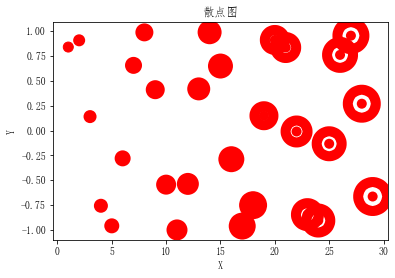

In [4]:
# 6-19 scatter diagram
point_num = 30
x = np.arange(1, point_num)
y = np.sin(x)

setChinese()
plt.title('散点图')

plt.xlabel('X')
plt.ylabel('Y')

linewidth = x
plt.scatter(x, y, c='r', s=100, linewidths=linewidth, marker='o')


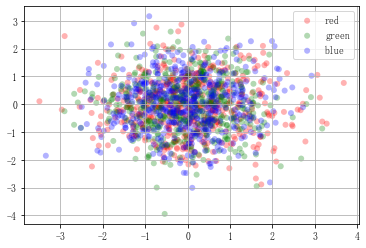

In [5]:
# 6-20 scatter diagram 2
fig, ax = plt.subplots()

setChinese()

colors = ['red', 'green', 'blue']
for color in colors:
    n = 500
    x, y = np.random.randn(2, n)
    # print(x.shape, y.shape)
    
    ax.scatter(x, y, c=color, alpha=0.3, edgecolors='none')

ax.legend(colors, loc='upper right')
ax.grid(True)

plt.show()

<AxesSubplot:>

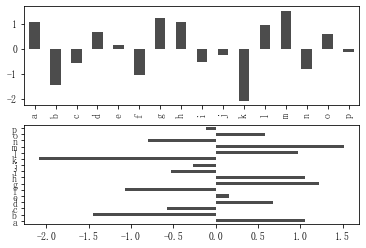

In [6]:
# 6-21 histogram

fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.randn(16), index=list('abcdefghijklmnop'))

data.plot.bar(ax = axes[0], color='k', alpha=0.7)
data.plot.barh(ax = axes[1], color='k', alpha=0.7)

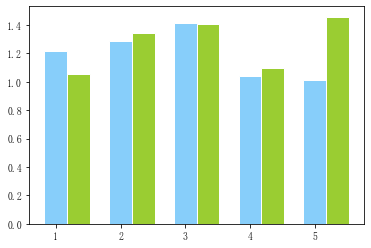

In [7]:
# 6-2 histogram plot by plt
plt.subplots()
setChinese()

x = np.arange(1, 6)
Y1 = np.random.uniform(low=1, high=1.5, size=5)
Y2 = np.random.uniform(low=1, high=1.5, size=5)

plt.bar(x, Y1, width=0.35, facecolor='lightskyblue', edgecolor='white')
plt.bar(x+0.35, Y2, width=0.35, facecolor='yellowgreen', edgecolor='white')

plt.show()

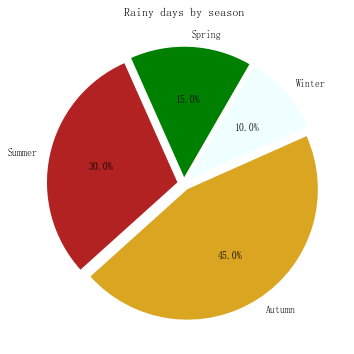

In [8]:
# 6-23 pie graph

plt.figure(figsize=(6, 6))

labels = ['Spring', 'Summer', 'Autumn', 'Winter']
colors = ['green', 'firebrick', 'goldenrod', 'azure']
x = [15, 30, 45, 10]
explode = (0.05, 0.05, 0.05, 0.05) # separate each part

# autopct = % float(1,1) % (% the symbol of pecentage)
# no space separate
plt.pie(x, labels=labels, colors=colors, explode=explode, startangle=60, autopct='%1.1f%%')

plt.title('Rainy days by season')
plt.show()

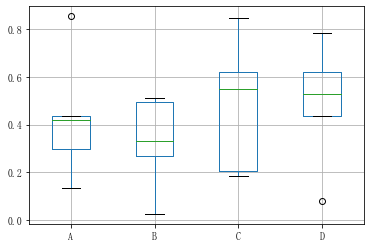

In [9]:
# 6-24 boxploto
np.random.seed(2)

df = pd.DataFrame(np.random.rand(5, 4), columns=['A', 'B', 'C', 'D'])
df.boxplot()
plt.show()

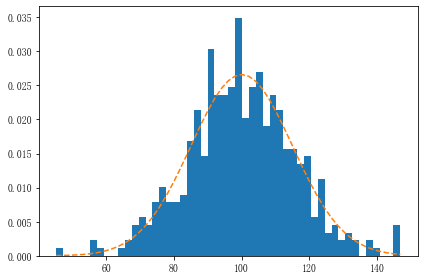

In [10]:
# 6-25  normal histgram
from scipy.stats import norm

fig, ax = plt.subplots()
setChinese()

np.random.seed(1587554)

mu = 100
sigma = 15
x = mu + sigma * np.random.randn(437)

num_bins = 50
n, bins, patches = ax.hist(x, num_bins, density=True)

y = norm.pdf(bins, mu, sigma) # 正态p概率d密度f函数
ax.plot(bins, y , '--')

fig.tight_layout()
plt.show()

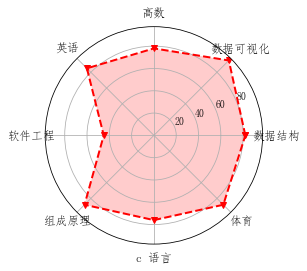

In [11]:
# 6-26 radar graph
setChinese()
courses = ['数据结构', '数据可视化', '高数', '英语', '软件工程', '组成原理', 'c 语言', '体育']
scores = [82, 95, 78, 85, 45, 88, 76, 88]

dataLength = len(scores) # separate parts of the len which count scores
angles = np.linspace(0, 2 * np.pi, dataLength, endpoint=False)

# 绘制雷达图  补全一周
scores_ = scores.copy()
scores_.append(scores[0])
angles_ = np.append(angles, angles[0])
plt.polar(angles_, scores_, 'rv--', linewidth=2)

# 设置角度 网格标签
plt.thetagrids(angles*180/np.pi, courses, fontsize=12)

# 填充雷达图内部
plt.fill(angles, scores, facecolor='red', alpha=0.2)
plt.show()


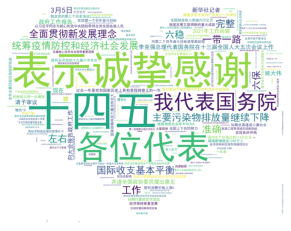

In [12]:
# 6-30 word cloud
from wordcloud import WordCloud, STOPWORDS
import PIL.Image as image
# import numpy as np
# import jieba

def get_word_list(word_list_path):
    f = open(word_list_path, encoding='utf8')
    wordList = f.read()
    return wordList

def get_word_cloud(word_list_path, img_mask_path):
    word_list = get_word_list(word_list_path)
    img_mask = np.array(image.open(img_mask_path))
    
    # load wordlist and set background image mask
    font_path = r"C:\Windows\Fonts\simhei.ttf"
    wordcloud = WordCloud(font_path=font_path,background_color='white', mask=img_mask).generate(word_list)

    plt.axis('off') # undisplay axies
    plt.imshow(wordcloud)

# report
setChinese()
word_list_path = '..//data//report_review.txt'
img_mask_path = '..//data//heart.jpg'
get_word_cloud(word_list_path, img_mask_path)

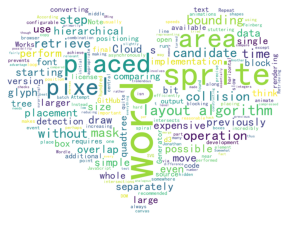

In [13]:
import os
src_path = os.path.abspath('.')
word_list_path = '..//data//word1.txt'
img_mask_path = '..//data//heart.jpg'
get_word_cloud(word_list_path, img_mask_path)

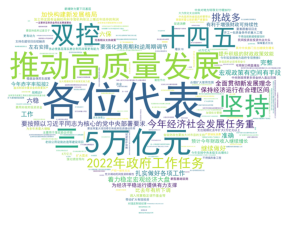

In [14]:
# report
setChinese()
word_list_path = '..//data//report_todo.txt'
img_mask_path = '..//data//heart.jpg'
get_word_cloud(word_list_path, img_mask_path)

In [15]:
import re
import jieba

def get_filter_source_symbols(source):
    r_en = "[A-Za-z0-9_.!+-=——,$%^~@#￥%……&*《》<>「」{}()/\\\[\]'\"]"
    filter_en_source = re.sub(r_en, '', source)
    r_cn = r"[，。？ \n\t：！“”（）【】、；]"
    filter_cn_source = re.sub(r_cn, '', filter_en_source)

    return filter_cn_source


In [16]:
def get_sort_data(data, data_count):
    arg_index = data_count.argsort()

    sort_data = data[arg_index]
    sort_count = data_count[arg_index]
    return sort_data, sort_count

def get_data_without_single_word(sort_result, sort_count):
    i = 0
    single_word_indexs = []
    for word in sort_result:
        if len(word) <= 1:
            single_word_indexs.append(i)
        
        i += 1

    data = np.delete(sort_result, single_word_indexs)
    data_count = np.delete(sort_count, single_word_indexs)

    return data, data_count

In [17]:
def get_data(word_list_path):
    source = get_word_list(word_list_path)
    filter_source = get_filter_source_symbols(source)

    split_word_list = list(jieba.cut(filter_source, cut_all=False))
    result, count = np.unique(split_word_list, return_counts=True)

    data, data_count = get_data_without_single_word(result, count)

    sort_data, sort_data_count = get_sort_data(data, data_count)

    return sort_data, sort_data_count
    

In [18]:
def get_top_data(topNum, data, data_count):
    size = len(data)
    from_index = size - topNum
    
    return data[from_index:], data_count[from_index:]

def getSpecifiedLenWord(slen, data, count):
    
    unsatisfiedIndexs = []
    i = 0 

    for word in data:
        if len(word) != slen:
            unsatisfiedIndexs.append(i)
        
        i = i + 1

    data = np.delete(data, unsatisfiedIndexs)
    count = np.delete(count, unsatisfiedIndexs)

    return data, count

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 1.499 seconds.
Prefix dict has been built successfully.


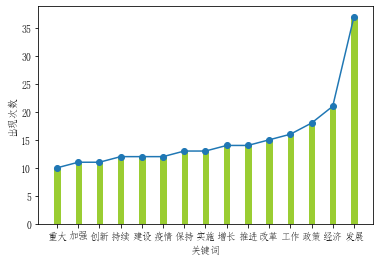

In [19]:
report_review_word_path = r'../data/report_review.txt'
data, data_count = get_data(report_review_word_path)
topData, topCount = get_top_data(15, data, data_count)

plt.subplots()
setChinese()

x = topData
y = topCount

x_mask = np.arange(len(x))
plt.plot(x_mask, y, marker='o', linestyle='-' )
plt.bar(x, y, width=0.35, facecolor='yellowgreen', edgecolor='white')
plt.ylabel('出现次数')
plt.xlabel('关键词')

plt.show()

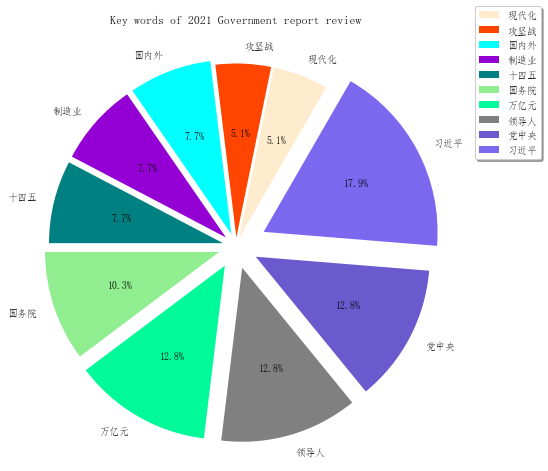

In [20]:
import matplotlib.colors as pltc
from random import sample

all_colors = [k for k,v in pltc.cnames.items()]

plt.figure(figsize=(8, 8))

# data, data_count = get_data(report_review_word_path)
specified_data, specified_count = getSpecifiedLenWord(3, data, data_count)

topData, topCount = get_top_data(10, specified_data, specified_count )
# topData, topCount = topData, topCount

labels = topData
proportion = topCount
colors = sample(all_colors, len(labels))

# explode = tuple(((proportion == max(proportion)).astype(int) / 2).tolist()) 

explode = tuple((proportion / np.sum(proportion)).tolist()) 

# autopct = % float(1,1) % (% the symbol of pecentage)
# no space separate
plt.pie(proportion, labels=labels, colors=colors, explode=explode,  startangle=60, autopct='%1.1f%%')
plt.legend(labels, loc=(1.05, 0.7), shadow=True)

plt.title("Key words of 2021 Government report review")
plt.show()

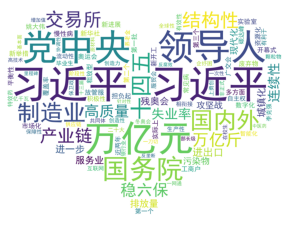

In [21]:
from wordcloud import WordCloud, STOPWORDS
import PIL.Image as image


def get_word_list(word_list_path):
    f = open(word_list_path, encoding='utf8')
    wordList = f.read()
    return wordList

def get_word_cloud(word_list_path, img_mask_path):
    word_list = get_word_list(word_list_path)
    img_mask = np.array(image.open(img_mask_path))
    
    # load wordlist and set background image mask
    font_path = r"C:\Windows\Fonts\simhei.ttf"
    wordcloud = WordCloud(font_path=font_path,background_color='white', mask=img_mask).generate(word_list)

    plt.axis('off') # undisplay axies
    plt.imshow(wordcloud)

# report
setChinese()
report_todo_word_path = r'../data/report_todo.txt'
img_mask_path = '..//data//heart.jpg'
# get_word_cloud(report_todo_word_path, img_mask_path)

def get_specified_len_word_cloud(specified_data, specified_count, mask_path):
    word_join = ""
    all_list = []

    for word, count in zip(specified_data, specified_count):
        temp_list = []
        temp_list.append(word)
        
        temp_list = temp_list * count

        all_list += temp_list

    word_join = " ".join(all_list)
    word_list = word_join
    img_mask = np.array(image.open(img_mask_path))

    font_path = r"C:\Windows\Fonts\simhei.ttf"
    wordcloud = WordCloud(font_path=font_path,background_color='white', mask=img_mask).generate(word_list)

    plt.axis('off') # undisplay axies
    plt.imshow(wordcloud)

get_specified_len_word_cloud(specified_data, specified_count, img_mask_path)

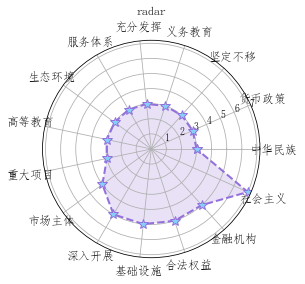

In [22]:
todo_data, todo_count = get_data(report_todo_word_path)
specified_data, specified_count = getSpecifiedLenWord(4, todo_data, todo_count)
top_todo_data, top_todo_count = get_top_data(15, specified_data, specified_count)

labels, proportion = top_todo_data, top_todo_count 

dataLength = len(proportion) # separate parts of the len which count scores
angles = np.linspace(0, 2 * np.pi, dataLength, endpoint=False)

# 绘制雷达图  补全一周
proportion_ = proportion.copy().tolist()
proportion_.append(proportion[0])
proportion_ = np.array(proportion_)

angles_ = np.append(angles, angles[0])

color = 'mediumpurple'
markercolor = 'lightskyblue'
plt.polar(angles_, proportion_,marker="*", markersize=10, markerfacecolor=markercolor ,color=color, linestyle='--', linewidth=2)

# 设置角度 网格标签
plt.thetagrids(angles*180/np.pi, labels, fontsize=12)


# 填充雷达图内部
plt.fill(angles, proportion, facecolor=color, alpha=0.2)
plt.title('radar')
plt.show()